<a href="https://colab.research.google.com/github/LaraN01/DrugData_AdverseEvents/blob/main/Notebook_2_data_preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import os
import ast
import matplotlib.pyplot as plt

import functions

C:\Users\lnonis\AppData\Local\Temp\ipykernel_25312\2619883542.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
fda_json=pd.read_csv('datasets//fdajson.csv')
dailymed=pd.read_csv('datasets//scraped_dailymed.csv')
moieties=pd.read_csv('datasets//substance_moieties.csv')

In [ ]:
print('FDA json=', fda_json.shape)
print('dailymed=', dailymed.shape)
print('moieties shape=', moieties.shape)

FDA json= (126937, 12)
dailymed= (19968, 8)
moieties shape= (134019, 16)


In [ ]:
dailymed_to_drop=['Inactive Ingredient Names',
                  'NDC Codes']

moieties_to_drop=['id',
                  'type',
                  'value',
                  'units',
                  'uuid.1']

fda_json_to_drop=['Application number 1 FDA',
                  'Sponsor name FDA',
                  'Reference drug FDA',
                  'Brand name FDA',
                  'Marketing status FDA',
                  'Application number 2 FDA',
                  'Manufacturer name FDA',
                  'rxcui FDA',
                  'Submission orig status FDA',
                  'Submission orig status date FDA',
                  'Number of submissions FDA']

In [ ]:
dailymed_red=dailymed.drop(dailymed_to_drop, axis=1)
fda_json_red=fda_json.drop(fda_json_to_drop, axis=1)
moieties_red=moieties.drop(moieties_to_drop, axis=1)

In [ ]:
# fda_json_red['spl_set_id']=fda_json_red['Spl_set_id_FDA']
# dailymed_red['spl_set_id']=dailymed_red['openfda_spl_set_id']
# dailymed_red['unii']=dailymed_red['UNII Codes for Active Ingredients']

In [ ]:
# fda_json_red.drop('Spl_set_id_FDA', axis=1, inplace=True)
# dailymed_red.drop(['openfda_spl_set_id','UNII Codes for Active Ingredients'], axis=1, inplace=True)

In [ ]:
dailymed_moieties=pd.merge(dailymed_red, moieties_red,
                           left_on='UNII Codes for Active Ingredients',
                           right_on='unii')

In [ ]:
part_one=pd.read_csv('datasets//daily_moieties_df.csv')

In [ ]:
part_one

,Unnamed: 0,openfda_spl_set_id,UNII Codes for Inactive Ingredients,Active Ingredient Names,UNII Codes for Active Ingredients,Routes of Administration,Product Types,atropisomerism,charge,count,stereochemistry,defined_stereo,ez_centers,molecular_weight,optical_activity,stereo_centers
0,0,9c4a7aec-daef-4961-ba77-92f4b58be780,"AB6MNQ6J6L, 5SL0G7R0OK, QTT17582CB, 55X04QC32I...",ZAVEGEPANT HYDROCHLORIDE,000QCM6HAL,NASAL,HUMAN PRESCRIPTION DRUG,No,0,1,ACHIRAL,0,0,36.4609,NONE,0
1,1,9c4a7aec-daef-4961-ba77-92f4b58be780,"AB6MNQ6J6L, 5SL0G7R0OK, QTT17582CB, 55X04QC32I...",ZAVEGEPANT HYDROCHLORIDE,000QCM6HAL,NASAL,HUMAN PRESCRIPTION DRUG,No,0,1,ABSOLUTE,1,0,638.8036,UNSPECIFIED,1
2,2,1191475f-e999-49f4-a805-93ad08596b1b,"AB6MNQ6J6L, 5SL0G7R0OK, QTT17582CB, 55X04QC32I...",ZAVEGEPANT HYDROCHLORIDE,000QCM6HAL,NASAL,HUMAN PRESCRIPTION DRUG,No,0,1,ACHIRAL,0,0,36.4609,NONE,0
3,3,1191475f-e999-49f4-a805-93ad08596b1b,"AB6MNQ6J6L, 5SL0G7R0OK, QTT17582CB, 55X04QC32I...",ZAVEGEPANT HYDROCHLORIDE,000QCM6HAL,NASAL,HUMAN PRESCRIPTION DRUG,No,0,1,ABSOLUTE,1,0,638.8036,UNSPECIFIED,1
4,4,5c4fa959-6167-4530-9840-af5540197bd6,"ETJ7Z6XBU4, 39J80LT57T, 36SFW2JZ0W, EWQ57Q8I5X...",MINOCYCLINE HYDROCHLORIDE,0020414E5U,ORAL,HUMAN PRESCRIPTION DRUG,No,0,1,ACHIRAL,0,0,36.4609,NONE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25999,25999,a99fe500-f52b-483c-807c-178f1a78a02b,"B22547B95K, XF417D3PSL, 451W47IQ8X, 55X04QC32I...",NALBUPHINE HYDROCHLORIDE,ZU4275277R,"INTRAMUSCULAR, INTRAVENOUS, SUBCUTANEOUS",HUMAN PRESCRIPTION DRUG,No,0,1,ACHIRAL,0,0,36.4609,NONE,0
26000,26000,a99fe500-f52b-483c-807c-178f1a78a02b,"B22547B95K, XF417D3PSL, 451W47IQ8X, 55X04QC32I...",NALBUPHINE HYDROCHLORIDE,ZU4275277R,"INTRAMUSCULAR, INTRAVENOUS, SUBCUTANEOUS",HUMAN PRESCRIPTION DRUG,No,0,1,ABSOLUTE,5,0,357.4442,UNSPECIFIED,5
26001,26001,1b4121ee-a733-4456-a917-be2603477839,"5138Q19F1X, H3R47K3TBD, 07XHK4SAV6, 2G86QN327L...",TAFAMIDIS MEGLUMINE,ZU7CF08A1A,ORAL,HUMAN PRESCRIPTION DRUG,No,0,1,ABSOLUTE,4,0,195.2139,UNSPECIFIED,4
26002,26002,1b4121ee-a733-4456-a917-be2603477839,"5138Q19F1X, H3R47K3TBD, 07XHK4SAV6, 2G86QN327L...",TAFAMIDIS MEGLUMINE,ZU7CF08A1A,ORAL,HUMAN PRESCRIPTION DRUG,No,0,1,ACHIRAL,0,0,308.1167,NONE,0


In [ ]:
dailymed_moieties.columns

Index(['openfda_spl_set_id', 'UNII Codes for Inactive Ingredients',
       'Active Ingredient Names', 'UNII Codes for Active Ingredients',
       'Routes of Administration', 'Product Types', 'uuid', 'atropisomerism',
       'charge', 'count', 'stereochemistry', 'defined_stereo', 'ez_centers',
       'molecular_weight', 'optical_activity', 'stereo_centers', 'unii'],
      dtype='object')

In [ ]:
dailymed_moieties_array=dailymed_moieties.to_numpy()

In [ ]:
dailymed_moieties_array[0,13]

521.4304

In [ ]:
def weight_cleaner(array, col_1, col_2):
    for i in range(len(array) - 1):
        if array[i][col_1] == array[i + 1][col_1]:
            if array[i + 1][col_2] > array[i][col_2]:
                array[i] = array[i + 1]
    return None


In [ ]:
weight_cleaner(dailymed_moieties_array,4,13)

In [ ]:
data_test=pd.DataFrame(dailymed_moieties_array, columns=['openfda_spl_set_id', 'UNII Codes for Inactive Ingredients',
       'Active Ingredient Names', 'UNII Codes for Active Ingredients',
       'Routes of Administration', 'Product Types', 'uuid', 'atropisomerism',
       'charge', 'count', 'stereochemistry', 'defined_stereo', 'ez_centers',
       'molecular_weight', 'optical_activity', 'stereo_centers', 'unii'])

In [ ]:
print('data test shape is= ',data_test.shape)
data_new=data_test.drop_duplicates()
print('data test cleaned shape is= ', data_new.shape)

data test shape is=  (26004, 17)
data test cleaned shape is=  (17877, 17)


In [ ]:
data_new.to_csv('daily_moieties_weight_correct.csv')

# 2. Data

## 2.2 Load datasets (drive)

In [ ]:
# # To activate when running on Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# # Adapt the paths with your Drive structure
# adverse_events=pd.read_csv('/content/drive/MyDrive/Final_project/datasets/adverseeventsfda_Q42023.csv')
# adverse_events_2023=pd.read_csv('/content/drive/MyDrive/Final_project/datasets/adverseeventsfda_2022_Q1Q2Q32023.csv')
# fda_json=pd.read_csv('/content/drive/MyDrive/Final_project/datasets/06_Final//fdajson.csv')
# dailymed=pd.read_csv('/content/drive/MyDrive/Final_project/datasets/scraped_dailymed.csv')
# moieties=pd.read_csv('/content/drive/MyDrive/Final_project/datasets/substance_moieties.csv')

## 2.3 Visualize the dataframes

In [ ]:
print('Combination of moieties and dailymed shape is =', merged_part_1.shape)
merged_part_1.head(5)

Combination of moieties and dailymed shape is = (17877, 17)


,openfda_spl_set_id,UNII Codes for Inactive Ingredients,Active Ingredient Names,UNII Codes for Active Ingredients,Routes of Administration,Product Types,uuid,atropisomerism,charge,count,stereochemistry,defined_stereo,ez_centers,molecular_weight,optical_activity,stereo_centers,unii
0,9253f6a9-2cf7-412d-b7a5-d9292d7b97fd,"KEH0A3F75J, E4GA8884NN, F76354LMGR, 2KR89I4H1Y...",MOMETASONE FUROATE,04201GDN4R,TOPICAL,HUMAN PRESCRIPTION DRUG,fc3311a1-cc99-4101-9922-8ac1dcc952e5,No,0,1,ABSOLUTE,8,0,521.4304,UNSPECIFIED,8,04201GDN4R
1,7a6a9590-9983-46ff-ae5c-fe95f4e16cb8,NaN,SILVER SULFADIAZINE,W46JY43EJR,TOPICAL,HUMAN PRESCRIPTION DRUG,b26421ef-8bd9-4c7c-bfd5-572f813151b4,No,0,1,ACHIRAL,0,0,250.2785,NONE,0,W46JY43EJR
3,c437213a-1cd4-445e-a39f-bbcacb9f746f,NaN,SILVER SULFADIAZINE,W46JY43EJR,TOPICAL,HUMAN PRESCRIPTION DRUG,b26421ef-8bd9-4c7c-bfd5-572f813151b4,No,0,1,ACHIRAL,0,0,250.2785,NONE,0,W46JY43EJR
5,32e6366a-8bb4-4b67-b4a3-e372c7696fa7,"3SY5LH9PMK, 7Z8S9VYZ4B, O8232NY3SJ, 35SW5USQ3G...",NORETHINDRONE,T18F433X4S,ORAL,HUMAN PRESCRIPTION DRUG,16033227-ca1a-45b5-85bd-53a51eeb2247,No,0,1,ABSOLUTE,6,0,298.4200,UNSPECIFIED,6,T18F433X4S
6,df29577b-c2f0-bea8-b048-7719972707aa,"3SY5LH9PMK, 7Z8S9VYZ4B, O8232NY3SJ, 35SW5USQ3G...",NORETHINDRONE,T18F433X4S,ORAL,HUMAN PRESCRIPTION DRUG,16033227-ca1a-45b5-85bd-53a51eeb2247,No,0,1,ABSOLUTE,6,0,298.4200,UNSPECIFIED,6,T18F433X4S


In [ ]:
print('Adverse event dataset shape is =', adverse_events.shape)
adverse_events.head(3)


Adverse event dataset shape is = (415378, 12)


,safetyreportid,serious,seriousnessdeath,seriousnesslifethreatening,seriousnesshospitalization,seriousnessdisabling,seriousnesscongenitalanomali,seriousnessother,reactionmeddrapt,reactionoutcome,spl_set_id,patientsex
0,22604587,2,2.0,2.0,2.0,2.0,2.0,2.0,['Nasal polyps'],['3'],"['595f437d-2729-40bb-9c62-c8ece1f82780', '595f...",1.0
1,23280317,1,1.0,NaN,NaN,NaN,NaN,NaN,"['Rhabdomyolysis', 'Acute kidney injury', 'Dru...","['5', '5', '5', '5']","['326d8586-042f-44f8-8530-e46b7b777bc3', '9daf...",2.0
2,23282668,1,NaN,NaN,NaN,NaN,NaN,1.0,['Myocardial injury'],['2'],"['5fb3a2d5-b9ec-4044-abb9-3e0d848a448e', '6986...",1.0


# 3. Preparation

Due to the shape of the dataframes, and in particolar of the adverse event one, the dataframes will be converted in np.arrays and the subsequent preparation steps will be performed on the arrays.

Adverse events dataset has a very long string, combination of many spl_set_id in the corresponding field. As spl_set_id is the submission code to FDA, the string will be converted in list and the first item only will be kept (first submission). Another option could be to split in single entries and keep all spl_set_id. The appproach will be tested in the smallest adverse_events dataset in order to verify if more entries will be maintained after merging with dailymed_moieties dataset.

In [ ]:
# List of the columns to be used when we'll create again the dataframe

adverse_events.columns

Index(['safetyreportid', 'serious', 'seriousnessdeath',
       'seriousnesslifethreatening', 'seriousnesshospitalization',
       'seriousnessdisabling', 'seriousnesscongenitalanomali',
       'seriousnessother', 'reactionmeddrapt', 'reactionoutcome', 'spl_set_id',
       'patientsex'],
      dtype='object')

In [ ]:
adverse_events.loc[1,'spl_set_id']

"['326d8586-042f-44f8-8530-e46b7b777bc3', '9daf3136-74b6-4410-8256-cbc9dd700f61', '222a461b-3f83-4e03-a7a1-9f695a5e5232', 'a7b0a70b-a117-48cf-a6bc-260be1dac1e7', '8f87e3e1-4c9c-497a-af20-8ab52cfeef60', '9dea4789-bf1c-1577-e053-2a95a90a5381', 'c3832113-f517-4b4e-bf9c-31fce1a638e1', '1076119b-c68e-4c1e-b6d7-58cd14568e75', 'de5def4a-f77f-4ea6-a497-24f041c1f123', 'a9412747-c7f9-4242-91ed-3695f372f6c9', '28a3ece3-78fb-4121-86a7-adc4a9d9540f', 'e799c808-7c0f-482d-99d2-35fc34dbb2ea', 'a32cf699-e63e-4bd3-a5af-9e1ba447e02e', 'e0b309a5-bebe-c6da-2847-bda21aa488b1', '32e79416-5de4-4f06-9fff-f8c36a1ad5db', '98a4ed66-2813-49de-8cda-94c41cc3ca9f', '5019361d-e6af-4c3d-a246-a43358ae914c', '7037e539-118a-4b8f-9d87-e57bfc142649', 'd985c2a4-c0e8-4d87-9fcd-2b1aeda0198e', '2ba1924b-9967-4adb-9061-d023ef44ab3e', '34221c17-0d8c-4b56-8af3-c74efab4599e', 'daf41866-6f2b-4483-b575-456becd6e85f', '58293d62-089d-49ab-b691-dfd705ac9a9c', 'fd853928-05e1-4db9-bb1d-6e6e6eaec7ed', '92b31fc4-0f02-4857-b11f-49b9f942ee84'

In [ ]:
adv_ev_array=adverse_events.to_numpy()

In [ ]:
new_array=functions.split_list_get_first(adv_ev_array,10)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000
137000
138000
139000
140000
141000
142000
143000
144000
145000
146000
147000
148000
149000
150000
151000
152000
153000
154000
155000
156000
157000
158000


In [ ]:
adverse_events=pd.DataFrame(new_array, columns=['safetyreportid', 'serious', 'seriousnessdeath',
       'seriousnesslifethreatening', 'seriousnesshospitalization',
       'seriousnessdisabling', 'seriousnesscongenitalanomali',
       'seriousnessother', 'reactionmeddrapt', 'reactionoutcome', 'spl_set_id',
       'patientsex'])

In [ ]:
adverse_events.shape

(415378, 12)

In [ ]:
adverse_events.head(3)

,safetyreportid,serious,seriousnessdeath,seriousnesslifethreatening,seriousnesshospitalization,seriousnessdisabling,seriousnesscongenitalanomali,seriousnessother,reactionmeddrapt,reactionoutcome,spl_set_id,patientsex
0,22604587,2,2.0,2.0,2.0,2.0,2.0,2.0,['Nasal polyps'],['3'],595f437d-2729-40bb-9c62-c8ece1f82780,1.0
1,23280317,1,1.0,NaN,NaN,NaN,NaN,NaN,"['Rhabdomyolysis', 'Acute kidney injury', 'Dru...","['5', '5', '5', '5']",326d8586-042f-44f8-8530-e46b7b777bc3,2.0
2,23282668,1,NaN,NaN,NaN,NaN,NaN,1.0,['Myocardial injury'],['2'],5fb3a2d5-b9ec-4044-abb9-3e0d848a448e,1.0


## 3.1 Merge in a partial  dataset

In [ ]:
# Format check in adverse event
adverse_events.loc[1,'spl_set_id']

'326d8586-042f-44f8-8530-e46b7b777bc3'

In [ ]:
# Format check in dailymed moieties
merged_part_1.loc[10,'openfda_spl_set_id']

'0a1f2f64-3b0b-5e5c-e063-6294a90a7185'

In [ ]:
# inner= intersection of keys from both frames, default is how=inner

daily_adverse=pd.merge(merged_part_1, adverse_events,left_on='openfda_spl_set_id', right_on='spl_set_id')

In [ ]:
daily_adverse.shape

(211202, 29)

In [ ]:
daily_adverse.head(3)

,openfda_spl_set_id,UNII Codes for Inactive Ingredients,Active Ingredient Names,UNII Codes for Active Ingredients,Routes of Administration,Product Types,uuid,atropisomerism,charge,count,...,seriousnessdeath,seriousnesslifethreatening,seriousnesshospitalization,seriousnessdisabling,seriousnesscongenitalanomali,seriousnessother,reactionmeddrapt,reactionoutcome,spl_set_id,patientsex
0,3b0dccd6-dee1-49dd-8c6d-82df5c7ee36c,"KEH0A3F75J, F76354LMGR, 4T6H12BN9U, 7G1J5DA97F",Alclometasone dipropionate,S56PQL4N1V,TOPICAL,HUMAN PRESCRIPTION DRUG,2978f8c4-2bce-4a57-b781-a6a774c1daaf,No,0,1,...,2.0,2.0,2.0,2.0,2.0,2.0,"['Rash erythematous', 'Application site prurit...","['2', '2', '2', '2', '2', '2']",3b0dccd6-dee1-49dd-8c6d-82df5c7ee36c,NaN
1,cd742c16-c003-4c4c-8fa0-a3b4d0158383,"8SKN0B0MIM, 55X04QC32I, 506T60A25R, W4888I119H...",RISPERIDONE,L6UH7ZF8HC,ORAL,HUMAN PRESCRIPTION DRUG,324c9292-925d-4667-8392-bf05f13b1f94,No,0,1,...,2.0,2.0,1.0,2.0,2.0,2.0,"['Hepatic function abnormal', 'Extrapyramidal ...","['6', '6', '6', '6', '6', '6', '6', '6', '6', ...",cd742c16-c003-4c4c-8fa0-a3b4d0158383,NaN
2,cd742c16-c003-4c4c-8fa0-a3b4d0158383,"8SKN0B0MIM, 55X04QC32I, 506T60A25R, W4888I119H...",RISPERIDONE,L6UH7ZF8HC,ORAL,HUMAN PRESCRIPTION DRUG,324c9292-925d-4667-8392-bf05f13b1f94,No,0,1,...,1.0,2.0,1.0,2.0,2.0,2.0,"['Hypothermia', 'Hypoglycaemia', 'Bradycardia']","['5', '5', '5']",cd742c16-c003-4c4c-8fa0-a3b4d0158383,1.0


In [ ]:
daily_adverse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211202 entries, 0 to 211201
Data columns (total 29 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   openfda_spl_set_id                   211202 non-null  object 
 1   UNII Codes for Inactive Ingredients  203581 non-null  object 
 2   Active Ingredient Names              211202 non-null  object 
 3   UNII Codes for Active Ingredients    211202 non-null  object 
 4   Routes of Administration             211202 non-null  object 
 5   Product Types                        211202 non-null  object 
 6   uuid                                 211202 non-null  object 
 7   atropisomerism                       211202 non-null  object 
 8   charge                               211202 non-null  int64  
 9   count                                211202 non-null  int64  
 10  stereochemistry                      211202 non-null  object 
 11  defined_stere

In [ ]:
daily_adverse.columns

Index(['openfda_spl_set_id', 'UNII Codes for Inactive Ingredients',
       'Active Ingredient Names', 'UNII Codes for Active Ingredients',
       'Routes of Administration', 'Product Types', 'uuid', 'atropisomerism',
       'charge', 'count', 'stereochemistry', 'defined_stereo', 'ez_centers',
       'molecular_weight', 'optical_activity', 'stereo_centers', 'unii',
       'safetyreportid', 'serious', 'seriousnessdeath',
       'seriousnesslifethreatening', 'seriousnesshospitalization',
       'seriousnessdisabling', 'seriousnesscongenitalanomali',
       'seriousnessother', 'reactionmeddrapt', 'reactionoutcome', 'spl_set_id',
       'patientsex'],
      dtype='object')

## 3.2 Partial dataset improvement and cleaning

The additional field to handle is reactionmeddrapt and reactionoutcome that both contains many useful entries in the same field. They'll be converted from string to lists and the latter splitted in individual rows. Cleaning step will follow deleting Nan values from patientensex and reportid. Finally the seriouness fields will be combined in two scores: seriousness_score (combining all seriousness fields in one) and risk_score (combining seious category, seriousness fields and the otcome of the adverse event).

In [ ]:
# Convert the dataframes in np arrays

daily_adverse=daily_adverse.to_numpy()

In [ ]:
# entry verification on a random record

daily_adverse[:,26]

array(["['2', '2', '2', '2', '2', '2']",
       "['6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6', '6']",
       "['5', '5', '5']", ..., "['1', '6', '1']", "['6', '6']", "['5']"],
      dtype=object)

In [ ]:
# Split the adverse event description and outcome in single entries
# 25 is reactionmeddrapt, 26 is reactionoutcome

adv_ev_new = functions.col_splitter(daily_adverse, 25, 26)
print('Expanded array shape is =', adv_ev_new.shape)

Expanded array shape is = (738742, 29)


In [ ]:
# Drop Nan values

adv_ev_cleaned=functions.drop_nan(adv_ev_new, 28)  # patientensex
adv_ev_cleaned=functions.drop_nan(adv_ev_cleaned, 18)  # serious
print('After removal of NaN shape is= ' , adv_ev_cleaned.shape)

After removal of NaN shape is=  (633309, 29)


In [ ]:
# Calculate the seriousness score and drop the seriousness individual columns

col_list=[20,21,22,23,24] # seriousnesslifethreating to seriousnessother
adv_ev_ranked=functions.seriousness_ranker(adv_ev_cleaned,19,col_list=col_list)   # 19 seriousnessdeath
reduced_array=np.delete(adv_ev_ranked, np.s_[19:25], 1) # seriousnessdeath to seriousnessother(+1 due to np index)
print('Seriousness_score is calculated, 5 columns removed for each seriousness type')
print('Array with seriousness_score shape is= ', reduced_array.shape)

Seriousness_score is calculated, 5 columns removed for each seriousness type
Array with seriousness_score shape is=  (633309, 24)


In [ ]:
temp_df=pd.DataFrame(reduced_array, columns=['openfda_spl_set_id', 'UNII Codes for Inactive Ingredients',
       'Active Ingredient Names', 'UNII Codes for Active Ingredients',
       'Routes of Administration', 'Product Types', 'uuid', 'atropisomerism',
       'charge', 'count', 'stereochemistry', 'defined_stereo', 'ez_centers',
       'molecular_weight', 'optical_activity', 'stereo_centers', 'unii',
       'safetyreportid', 'serious', 'reactionmeddrapt', 'reactionoutcome', 'spl_set_id',
       'patientsex','seriousness_score'])

In [ ]:
temp_df.loc[:,['UNII Codes for Inactive Ingredients','safetyreportid', 'serious', 'reactionmeddrapt', 'reactionoutcome',
       'patientsex', 'seriousness_score']]

,UNII Codes for Inactive Ingredients,safetyreportid,serious,reactionmeddrapt,reactionoutcome,patientsex,seriousness_score
0,"8SKN0B0MIM, 55X04QC32I, 506T60A25R, W4888I119H...",23127343,1,Hypothermia,5,1.0,5
1,"8SKN0B0MIM, 55X04QC32I, 506T60A25R, W4888I119H...",23127343,1,Hypoglycaemia,5,1.0,5
2,"8SKN0B0MIM, 55X04QC32I, 506T60A25R, W4888I119H...",23127343,1,Bradycardia,5,1.0,5
3,"8SKN0B0MIM, 55X04QC32I, 506T60A25R, W4888I119H...",23275256,2,Hypophagia,6,1.0,0
4,"8SKN0B0MIM, 55X04QC32I, 506T60A25R, W4888I119H...",23275256,2,Condition aggravated,2,1.0,0
...,...,...,...,...,...,...,...
633304,"ETJ7Z6XBU4, 3A3U0GI71G, 70097M6I30, OP1R32D61U...",23070469,1,Muscle spasms,6,2.0,1
633305,"ETJ7Z6XBU4, 3A3U0GI71G, 70097M6I30, OP1R32D61U...",23070469,1,Drug withdrawal syndrome,1,2.0,1
633306,"ETJ7Z6XBU4, 3A3U0GI71G, 70097M6I30, OP1R32D61U...",23196400,2,Poor quality product administered,6,1.0,0
633307,"ETJ7Z6XBU4, 3A3U0GI71G, 70097M6I30, OP1R32D61U...",23196400,2,Product quality issue,6,1.0,0


In [ ]:
reduced_array[:,19]

array(['Hypothermia', 'Hypoglycaemia', 'Bradycardia', ...,
       'Poor quality product administered', 'Product quality issue',
       'Poisoning deliberate'], dtype=object)

In [ ]:
# Calculate the risk score from serious, outcome and seriousness score

red_array=functions.drop_string(reduced_array,20,string='')  # outcome columns values are recognized as string
ranked_array=functions.risk_ranker(red_array,18,20,23)  # serious, outcome and seriousness_score
print('Array with risk_score shape is', ranked_array.shape)

Array with risk_score shape is (630821, 25)


In [ ]:
# Visualize the array as pd.DataFrame

ranked_df=pd.DataFrame(ranked_array, columns=['openfda_spl_set_id', 'UNII Codes for Inactive Ingredients',
       'Active Ingredient Names', 'UNII Codes for Active Ingredients',
       'Routes of Administration', 'Product Types', 'uuid', 'atropisomerism',
       'charge', 'count', 'stereochemistry', 'defined_stereo', 'ez_centers',
       'molecular_weight', 'optical_activity', 'stereo_centers', 'unii',
       'safetyreportid', 'serious', 'reactionmeddrapt', 'reactionoutcome', 'spl_set_id',
       'patientsex','seriousness_score', 'risk score'])

ranked_df.head(10)

,openfda_spl_set_id,UNII Codes for Inactive Ingredients,Active Ingredient Names,UNII Codes for Active Ingredients,Routes of Administration,Product Types,uuid,atropisomerism,charge,count,...,stereo_centers,unii,safetyreportid,serious,reactionmeddrapt,reactionoutcome,spl_set_id,patientsex,seriousness_score,risk score
0,cd742c16-c003-4c4c-8fa0-a3b4d0158383,"8SKN0B0MIM, 55X04QC32I, 506T60A25R, W4888I119H...",RISPERIDONE,L6UH7ZF8HC,ORAL,HUMAN PRESCRIPTION DRUG,324c9292-925d-4667-8392-bf05f13b1f94,No,0,1,...,0,L6UH7ZF8HC,23127343,1,Hypothermia,5,cd742c16-c003-4c4c-8fa0-a3b4d0158383,1.0,5,15
1,cd742c16-c003-4c4c-8fa0-a3b4d0158383,"8SKN0B0MIM, 55X04QC32I, 506T60A25R, W4888I119H...",RISPERIDONE,L6UH7ZF8HC,ORAL,HUMAN PRESCRIPTION DRUG,324c9292-925d-4667-8392-bf05f13b1f94,No,0,1,...,0,L6UH7ZF8HC,23127343,1,Hypoglycaemia,5,cd742c16-c003-4c4c-8fa0-a3b4d0158383,1.0,5,15
2,cd742c16-c003-4c4c-8fa0-a3b4d0158383,"8SKN0B0MIM, 55X04QC32I, 506T60A25R, W4888I119H...",RISPERIDONE,L6UH7ZF8HC,ORAL,HUMAN PRESCRIPTION DRUG,324c9292-925d-4667-8392-bf05f13b1f94,No,0,1,...,0,L6UH7ZF8HC,23127343,1,Bradycardia,5,cd742c16-c003-4c4c-8fa0-a3b4d0158383,1.0,5,15
3,cd742c16-c003-4c4c-8fa0-a3b4d0158383,"8SKN0B0MIM, 55X04QC32I, 506T60A25R, W4888I119H...",RISPERIDONE,L6UH7ZF8HC,ORAL,HUMAN PRESCRIPTION DRUG,324c9292-925d-4667-8392-bf05f13b1f94,No,0,1,...,0,L6UH7ZF8HC,23275256,2,Hypophagia,6,cd742c16-c003-4c4c-8fa0-a3b4d0158383,1.0,0,5
4,cd742c16-c003-4c4c-8fa0-a3b4d0158383,"8SKN0B0MIM, 55X04QC32I, 506T60A25R, W4888I119H...",RISPERIDONE,L6UH7ZF8HC,ORAL,HUMAN PRESCRIPTION DRUG,324c9292-925d-4667-8392-bf05f13b1f94,No,0,1,...,0,L6UH7ZF8HC,23275256,2,Condition aggravated,2,cd742c16-c003-4c4c-8fa0-a3b4d0158383,1.0,0,5
5,cd742c16-c003-4c4c-8fa0-a3b4d0158383,"8SKN0B0MIM, 55X04QC32I, 506T60A25R, W4888I119H...",RISPERIDONE,L6UH7ZF8HC,ORAL,HUMAN PRESCRIPTION DRUG,324c9292-925d-4667-8392-bf05f13b1f94,No,0,1,...,0,L6UH7ZF8HC,23275256,2,Lethargy,2,cd742c16-c003-4c4c-8fa0-a3b4d0158383,1.0,0,5
6,cd742c16-c003-4c4c-8fa0-a3b4d0158383,"8SKN0B0MIM, 55X04QC32I, 506T60A25R, W4888I119H...",RISPERIDONE,L6UH7ZF8HC,ORAL,HUMAN PRESCRIPTION DRUG,324c9292-925d-4667-8392-bf05f13b1f94,No,0,1,...,0,L6UH7ZF8HC,23000379,1,Parkinsonism,2,cd742c16-c003-4c4c-8fa0-a3b4d0158383,2.0,1,9
7,cd742c16-c003-4c4c-8fa0-a3b4d0158383,"8SKN0B0MIM, 55X04QC32I, 506T60A25R, W4888I119H...",RISPERIDONE,L6UH7ZF8HC,ORAL,HUMAN PRESCRIPTION DRUG,324c9292-925d-4667-8392-bf05f13b1f94,No,0,1,...,0,L6UH7ZF8HC,22665276,1,Neutropenia,1,cd742c16-c003-4c4c-8fa0-a3b4d0158383,1.0,1,9
8,cd742c16-c003-4c4c-8fa0-a3b4d0158383,"8SKN0B0MIM, 55X04QC32I, 506T60A25R, W4888I119H...",RISPERIDONE,L6UH7ZF8HC,ORAL,HUMAN PRESCRIPTION DRUG,324c9292-925d-4667-8392-bf05f13b1f94,No,0,1,...,0,L6UH7ZF8HC,14595477,2,Emotional distress,6,cd742c16-c003-4c4c-8fa0-a3b4d0158383,1.0,0,5
9,cd742c16-c003-4c4c-8fa0-a3b4d0158383,"8SKN0B0MIM, 55X04QC32I, 506T60A25R, W4888I119H...",RISPERIDONE,L6UH7ZF8HC,ORAL,HUMAN PRESCRIPTION DRUG,324c9292-925d-4667-8392-bf05f13b1f94,No,0,1,...,0,L6UH7ZF8HC,14595477,2,Gynaecomastia,6,cd742c16-c003-4c4c-8fa0-a3b4d0158383,1.0,0,5


In [ ]:
ranked_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630821 entries, 0 to 630820
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   openfda_spl_set_id                   630821 non-null  object
 1   UNII Codes for Inactive Ingredients  605208 non-null  object
 2   Active Ingredient Names              630821 non-null  object
 3   UNII Codes for Active Ingredients    630821 non-null  object
 4   Routes of Administration             630821 non-null  object
 5   Product Types                        630821 non-null  object
 6   uuid                                 630821 non-null  object
 7   atropisomerism                       630821 non-null  object
 8   charge                               630821 non-null  object
 9   count                                630821 non-null  object
 10  stereochemistry                      630821 non-null  object
 11  defined_stereo            

In [ ]:
# verify that we have meaningful scores

ranked_df['risk score'].unique()

array([15, 5, 9, 11, 10, 7, 3, 8, 13, 12, 14, 6], dtype=object)

In [ ]:
ranked_df.shape

(630821, 25)

In [ ]:
len(ranked_df['UNII Codes for Active Ingredients'].unique())

1056

In [ ]:
# Save the frame as csv to concatenate with the frames coming from other years

ranked_df.to_csv('datasets/final_w_adv_ev_Q423.csv')

# 4. Final dataset

## 4.1 Concatenation

In [ ]:
adv_2020=pd.read_csv('datasets//final_w_adv_ev_2020.csv', index_col=0)
adv_2021=pd.read_csv('datasets//final_w_adv_ev_2021.csv', index_col=0)
adv_2022=pd.read_csv('datasets//final_w_adv_ev_2022_23.csv', index_col=0)
adv_2023=pd.read_csv('datasets//final_w_adv_ev_Q423.csv', index_col=0)

In [ ]:
adv_2020.columns

Index(['openfda_spl_set_id', 'UNII Codes for Inactive Ingredients',
       'Active Ingredient Names', 'UNII Codes for Active Ingredients',
       'Routes of Administration', 'Product Types', 'uuid', 'atropisomerism',
       'charge', 'count', 'stereochemistry', 'defined_stereo', 'ez_centers',
       'molecular_weight', 'optical_activity', 'stereo_centers', 'unii',
       'safetyreportid', 'serious', 'reactionmeddrapt', 'reactionoutcome',
       'spl_set_id', 'patientsex', 'seriousness_score', 'risk score'],
      dtype='object')

In [ ]:
adv_2020=adv_2020.to_numpy()
adv_2021=adv_2021.to_numpy()
adv_2022=adv_2022.to_numpy()
adv_2023=adv_2023.to_numpy()

In [ ]:
adv_stacked=np.vstack((adv_2020, adv_2021, adv_2022, adv_2023))

## 4.2 Cleaning

In [ ]:
adv_stacked=functions.drop_nan(adv_stacked,22) # patientsex, not recognized as nan after conversion

In [ ]:
adv_final=pd.DataFrame(adv_stacked, columns=['openfda_spl_set_id', 'UNII Codes for Inactive Ingredients',
       'Active Ingredient Names', 'UNII Codes for Active Ingredients',
       'Routes of Administration', 'Product Types', 'uuid', 'atropisomerism',
       'charge', 'count', 'stereochemistry', 'defined_stereo', 'ez_centers',
       'molecular_weight', 'optical_activity', 'stereo_centers', 'unii',
       'safetyreportid', 'serious', 'reactionmeddrapt', 'reactionoutcome',
       'spl_set_id', 'patientsex', 'seriousness_score', 'risk score'])

In [ ]:
adv_final_dropped=adv_final.drop_duplicates()
print('After drop_duplicates shape is ', adv_final_dropped.shape)
adv_final_clean=adv_final_dropped.dropna(subset=['UNII Codes for Inactive Ingredients'], axis=0)
print('After drop_nan shape is ', adv_final_clean.shape)

After drop_duplicates shape is  (9171932, 25)
After drop_nan shape is  (8859914, 25)


In [ ]:
adv_final_clean=adv_final_clean.drop(['openfda_spl_set_id','spl_set_id',
    'uuid',
    'unii',
    'safetyreportid',
    'serious',
    'reactionoutcome',
    'seriousness_score',
    'atropisomerism',
    'Active Ingredient Names',
    'reactionmeddrapt'], axis=1)

# reactionmeddrapt is removed for now as I tried to create the final dataset, i will add back if
# we need to check anything on the data

In [ ]:
print('Dataframe shape is', adv_final_clean.shape)
adv_final_clean.head(3)

Dataframe shape is (8859914, 14)


,UNII Codes for Inactive Ingredients,UNII Codes for Active Ingredients,Routes of Administration,Product Types,charge,count,stereochemistry,defined_stereo,ez_centers,molecular_weight,optical_activity,stereo_centers,patientsex,risk score
14,"8SKN0B0MIM, 55X04QC32I, 506T60A25R, W4888I119H...",L6UH7ZF8HC,ORAL,HUMAN PRESCRIPTION DRUG,0,1,ACHIRAL,0,0,410.4854,NONE,0,1.0,7
15,"8SKN0B0MIM, 55X04QC32I, 506T60A25R, W4888I119H...",L6UH7ZF8HC,ORAL,HUMAN PRESCRIPTION DRUG,0,1,ACHIRAL,0,0,410.4854,NONE,0,1.0,7
16,"8SKN0B0MIM, 55X04QC32I, 506T60A25R, W4888I119H...",L6UH7ZF8HC,ORAL,HUMAN PRESCRIPTION DRUG,0,1,ACHIRAL,0,0,410.4854,NONE,0,1.0,7


In [ ]:
adv_final_clean.columns

Index(['UNII Codes for Inactive Ingredients',
       'UNII Codes for Active Ingredients', 'Routes of Administration',
       'Product Types', 'charge', 'count', 'stereochemistry', 'defined_stereo',
       'ez_centers', 'molecular_weight', 'optical_activity', 'stereo_centers',
       'patientsex', 'risk score'],
      dtype='object')

## 4.3 Special columns handling

In [ ]:
# Patientsex

adv_final_clean['patientsex']=adv_final_clean['patientsex'].replace([2.0, 1.0, 0.0], ['female','male', 'drop'])
# adv_final_clean['patientsex'].unique() # check
adv_final_clean.drop(adv_final_clean[adv_final_clean['patientsex']=='drop'].index,inplace=True)

In [ ]:
# Route of administration column

adv_final_clean['Routes of Administration'].unique()

array(['ORAL', 'TOPICAL', 'VAGINAL', 'IRRIGATION',
       'INTRAMUSCULAR, INTRAVENOUS', 'INFILTRATION', 'INTRAMUSCULAR',
       'ORAL, RECTAL', 'OPHTHALMIC',
       'INTRATHECAL, INTRAVASCULAR, INTRAVENOUS, ORAL', 'INTRAVITREAL',
       'INTRAVENOUS', 'RESPIRATORY (INHALATION)', 'SUBLINGUAL',
       'INTRAVENOUS, INTRAMUSCULAR', 'TRANSDERMAL', 'NASAL',
       'INTRAOCULAR', 'SUBARACHNOID',
       'INTRACARDIAC, INTRAMUSCULAR, INTRAVENOUS, SUBCUTANEOUS',
       'INTRAVENOUS, INTRAVASCULAR, INTRAVENOUS, INTERSTITIAL, INTRADERMAL',
       'SUBCUTANEOUS', 'INTRACAVERNOUS', 'URETHRAL',
       'INTRAVENOUS, INTRAMUSCULAR, INTRAPLEURAL, INTRATHECAL',
       'EPIDURAL, INTRACAUDAL, INFILTRATION, PERINEURAL',
       'INTRAMUSCULAR, INTRAVENOUS, SUBCUTANEOUS',
       'INTRA-ARTICULAR, INTRALESIONAL, INTRAMUSCULAR, INTRASYNOVIAL, SOFT TISSUE',
       'OPHTHALMIC, TOPICAL', 'INTRAVENOUS, INTRAMUSCULAR, SUBCUTANEOUS',
       'INTRAVASCULAR', 'EPIDURAL, INFILTRATION, PERINEURAL',
       'INTRATHECAL

In [ ]:
parenteral_routes=['INTRAVENOUS',
 'SUBCUTANEOUS',
 'INTRAVENTRICULAR',
 'INTRA-ARTERIAL',
 'INTRAVENOUS, SUBCUTANEOUS',
 'INTRAVENOUS, INTRAVASCULAR, INTRAVENOUS, INTERSTITIAL, INTRADERMAL',
 'INTRAMUSCULAR, INTRAVENOUS, SUBCUTANEOUS',
 'INTRAVITREAL',
 'INTRAOCULAR',
 'INTRAMUSCULAR, INTRAVENOUS',
 'INTRAMUSCULAR',
 'INTRAVENOUS, INTRAMUSCULAR',
 'INTRAMUSCULAR, INTRAVENOUS, INTRA-ARTERIAL',
 'INTRA-ARTICULAR, INTRALESIONAL, INTRAMUSCULAR, INTRASYNOVIAL, SOFT TISSUE',
 'INTRAMUSCULAR, INTRASYNOVIAL, INTRALESIONAL, SOFT TISSUE',
 'INTRAVENOUS, INTRAMUSCULAR, SUBCUTANEOUS',
 'INFILTRATION',
 'INTRAVENOUS, INTRA-ARTERIAL',
 'SUBCUTANEOUS, INTRAVENOUS',
 'SUBARACHNOID',
 'EPIDURAL, INTRACAUDAL, INFILTRATION, PERINEURAL',
 'INTRACARDIAC, INTRAMUSCULAR, INTRAVENOUS, SUBCUTANEOUS',
 'INTRAVENOUS, INTRAMUSCULAR, SUBCUTANEOUS, INTRACARDIAC',
 'INTRA-ARTICULAR, INTRAMUSCULAR',
 'INTRA-ARTICULAR, INTRALESIONAL',
 'INTRACAVERNOUS','INTRAVENOUS, INTRAVASCULAR',
 'INTRAMUSCULAR, SUBCUTANEOUS',
 'INTRATHECAL',
 'INTRAVASCULAR',
 'INTRAVENOUS, INTRAMUSCULAR, PARENTERAL',
 'INTRAVENOUS, SUBCUTANEOUS, INTRAMUSCULAR',
 'INTRA-ARTERIAL, INTRAVENOUS',
 'INTRACAMERAL',
 'EPIDURAL, INTRAVENOUS',
 'INTRACAVITARY',
 'EPIDURAL, INFILTRATION, PERINEURAL',
 'INTRAVENOUS, INTRAMUSCULAR, INTRAPLEURAL, INTRATHECAL',
 'EPIDURAL, INTRATHECAL, INTRAVENOUS',
 'INTRAVENOUS, PARENTERAL',
 'INFILTRATION, PERINEURAL',
 'INTRAMUSCULAR, INTRAVENOUS, SUBCONJUNCTIVAL',
 'EPIDURAL, INFILTRATION, INTRACAUDAL, PERINEURAL',
 'EPIDURAL',
 'SUBMUCOSAL',
 'ORAL, TRANSMUCOSAL',
 'ORAL, INTRAVENOUS',
 'OPHTHALMIC, INTRAOCULAR',
 'INTRATHECAL, INTRAVASCULAR, INTRAVENOUS, ORAL',
 'INTRAMUSCULAR, INTRAVENOUS, RECTAL']

topical_routes=['OPHTHALMIC',
    'NASAL',
    'AURICULAR (OTIC)',
    'TRANSDERMAL',
    'IRRIGATION',
    'OPHTHALMIC, TOPICAL',
    'OPHTHALMIC, INTRACANALICULAR',
    'CUTANEOUS',
    'DENTAL',
    'TOPICAL, OPHTHALMIC',
    'INTRAOCULAR, OPHTHALMIC',
    'ORAL, SUBCUTANEOUS']

urogenital_routes=['VAGINAL','URETERAL','INTRAUTERINE','URETHRAL','INTRAVESICAL']

oral_routes= ['SUBLINGUAL', 'BUCCAL','ORAL, ORAL','BUCCAL, SUBLINGUAL','ORAL, RECTAL','ORAL, TOPICAL']

inhalation_routes=['RESPIRATORY (INHALATION), ORAL','ORAL, RESPIRATORY (INHALATION)','INTRAVENOUS, RESPIRATORY (INHALATION)']

In [ ]:
data=adv_final_clean.copy()

In [ ]:
data['Routes of Administration']=data['Routes of Administration'].replace(parenteral_routes, 'PARENTERAL')
data['Routes of Administration']=data['Routes of Administration'].replace(topical_routes, 'TOPICAL')
data['Routes of Administration']=data['Routes of Administration'].replace(urogenital_routes, 'UROGENITAL')
data['Routes of Administration']=data['Routes of Administration'].replace(oral_routes, 'ORAL')
data['Routes of Administration']=data['Routes of Administration'].replace(inhalation_routes, 'RESPIRATORY (INHALATION)')

## 4.4 Data types

In [ ]:
cols=['charge', 'count','defined_stereo', 'ez_centers', 'molecular_weight','stereo_centers','risk score']
converted_cols = [pd.to_numeric(data[col], errors='coerce',downcast='float') for col in cols]
data[cols] = pd.concat(converted_cols, axis=1)

In [ ]:
data.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 8859085 entries, 14 to 9224478
Data columns (total 14 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   UNII Codes for Inactive Ingredients  8859085 non-null  object 
 1   UNII Codes for Active Ingredients    8859085 non-null  object 
 2   Routes of Administration             8859085 non-null  object 
 3   Product Types                        8859085 non-null  object 
 4   charge                               8859085 non-null  float32
 5   count                                8859085 non-null  float32
 6   stereochemistry                      8859085 non-null  object 
 7   defined_stereo                       8859085 non-null  float32
 8   ez_centers                           8859085 non-null  float32
 9   molecular_weight                     8859085 non-null  float32
 10  optical_activity                     8859085 non-null  object 
 11  st

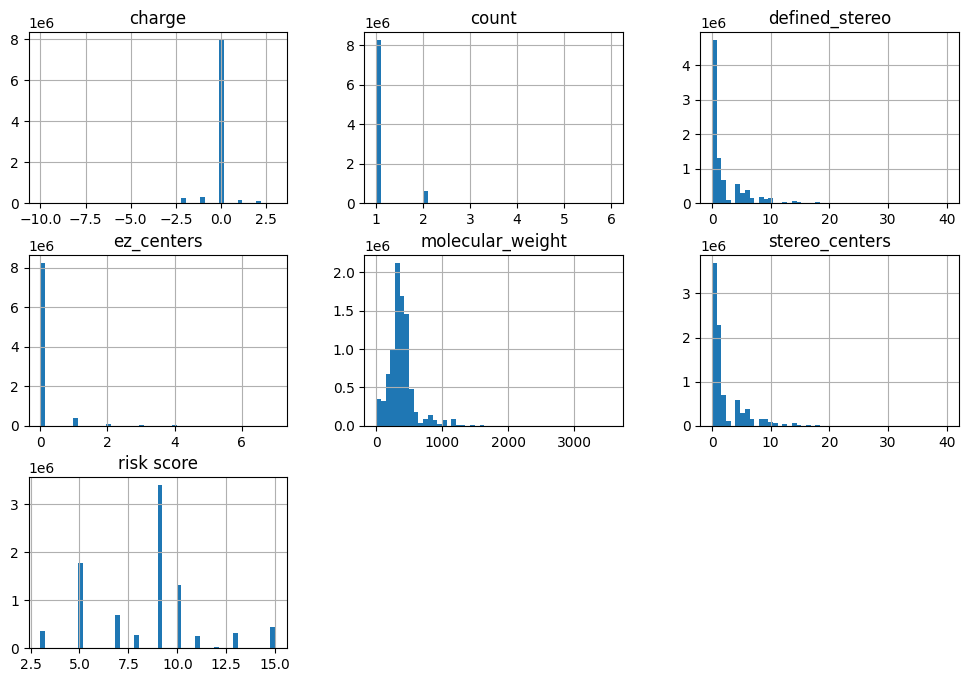

In [ ]:
data_num = data.select_dtypes(include=[np.number])
data_num.hist(bins=50, figsize=(12, 8))
plt.show()

In [ ]:
# data.to_csv('final_dataset_human_parenteral.csv')